# Frequency and Distribution

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# To recall, this is the code to mimic the roll dice game for 50 times

die = pd.DataFrame([1, 2, 3, 4, 5, 6])
trial = 50
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]
print(results)

[5, 7, 12, 5, 9, 7, 6, 5, 3, 3, 5, 3, 3, 2, 6, 5, 7, 7, 6, 6, 6, 2, 10, 8, 4, 6, 8, 9, 3, 5, 8, 12, 4, 4, 9, 7, 8, 8, 8, 8, 5, 8, 7, 7, 8, 6, 7, 11, 6, 7]


In [3]:
print(pd.DataFrame(results)[0])

0      5
1      7
2     12
3      5
4      9
5      7
6      6
7      5
8      3
9      3
10     5
11     3
12     3
13     2
14     6
15     5
16     7
17     7
18     6
19     6
20     6
21     2
22    10
23     8
24     4
25     6
26     8
27     9
28     3
29     5
30     8
31    12
32     4
33     4
34     9
35     7
36     8
37     8
38     8
39     8
40     5
41     8
42     7
43     7
44     8
45     6
46     7
47    11
48     6
49     7
Name: 0, dtype: int64


In [4]:
# This is the code for summarizing the results of sum of faces by frequency

freq = pd.DataFrame(results)[0].value_counts()
sort_freq = freq.sort_index()
print("original:\n", freq,"\n")
print("sorted:\n", sort_freq,"\n")


original:
 7     9
8     9
6     8
5     7
3     5
9     3
4     3
12    2
2     2
10    1
11    1
Name: 0, dtype: int64 

sorted:
 2     2
3     5
4     3
5     7
6     8
7     9
8     9
9     3
10    1
11    1
12    2
Name: 0, dtype: int64 



<AxesSubplot:>

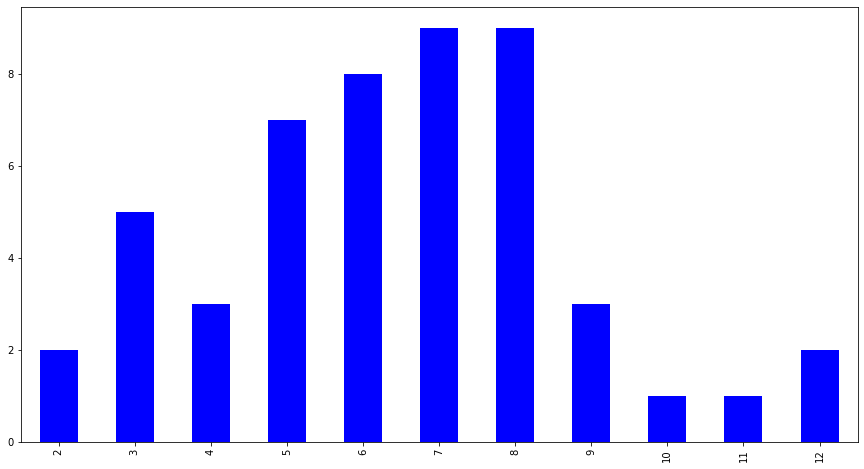

In [5]:
#plot the bar chart base on the result

sort_freq.plot(kind='bar', color='blue', figsize=(15, 8))

## Relative Frequency

<AxesSubplot:>

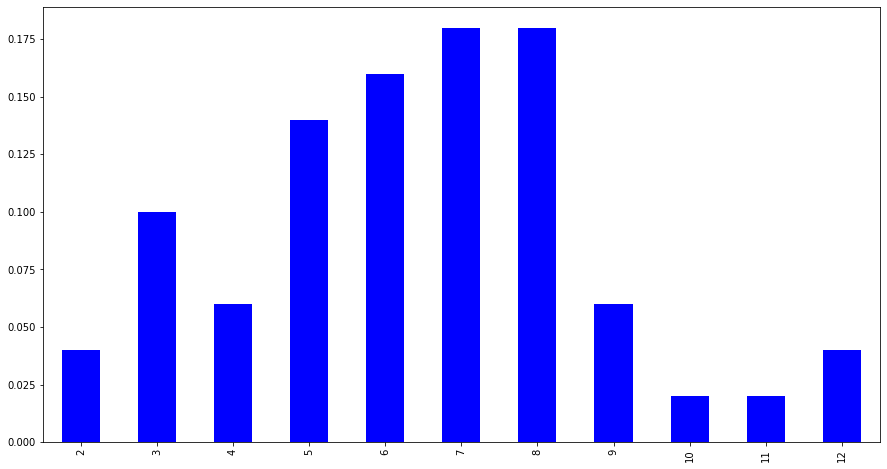

In [6]:
# Using relative frequency, we can rescale the frequency so that we can compare results from different number of trials
relative_freq = sort_freq/trial
relative_freq.plot(kind='bar', color='blue', figsize=(15, 8))

<AxesSubplot:>

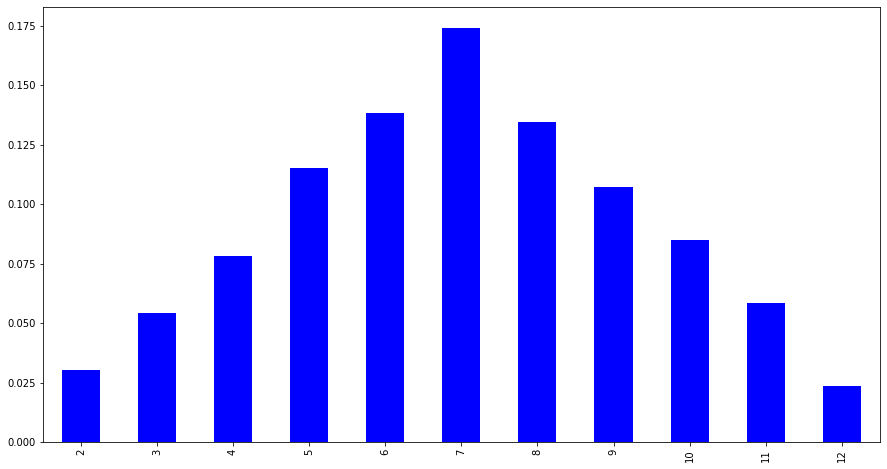

In [7]:
# Let us try to increase the number of trials to 10000, and see what will happen...
trial = 10000
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]
freq = pd.DataFrame(results)[0].value_counts()
sort_freq = freq.sort_index()
relative_freq = sort_freq/trial
relative_freq.plot(kind='bar', color='blue', figsize=(15, 8))

### We can see that with more trials, the result looks more and more stable, and this is very close to a probability distribution. Try increasing the number of "trial" further (but it may take some time for Jupyter Notebook to output the result)

## Expectation and Variance of a distribution

In [8]:
# assume that we have fair dice, which means all faces will be shown with equal probability
# then we can say we know the 'Distribtuion' of the random variable - sum_of_dice

X_distri = pd.DataFrame(index=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
X_distri['Prob'] = [1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]
X_distri['Prob'] = X_distri['Prob']/36
X_distri

,Prob
2,0.027778
3,0.055556
4,0.083333
5,0.111111
6,0.138889
7,0.166667
8,0.138889
9,0.111111
10,0.083333
11,0.055556


In [9]:
mean = pd.Series(X_distri.index * X_distri['Prob']).sum()
var = pd.Series(((X_distri.index - mean)**2)*X_distri['Prob']).sum()

In [10]:
#Output the mean and variance of the distribution. Mean and variance can be used to describe a distribution
print(mean, var)

6.999999999999998 5.833333333333333


## Empirical  mean and variance

In [11]:
# if we calculate mean and variance of outcomes (with high enough number of trials, eg 20000)...
trial = 20000
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]

In [12]:
#print the mean and variance of the 20000 trials
results = pd.Series(results)
print(results.mean(), results.var())

6.99185 5.794573306165308
